<a href="https://colab.research.google.com/github/calebajayi/Machine_Learning/blob/master/KMDenoisingAE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model


def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array


def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)


def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()

(60000, 28, 28, 1)


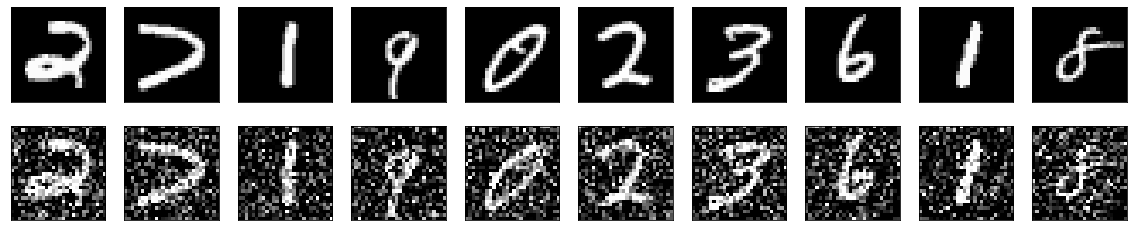

In [6]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
print(train_data.shape)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

In [ ]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

In [5]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Epoch 1/50
469/469 [==============================] - 145s 308ms/step - loss: 0.2491 - val_loss: 0.0729
Epoch 2/50
469/469 [==============================] - 145s 308ms/step - loss: 0.0724 - val_loss: 0.0694
Epoch 3/50
469/469 [==============================] - 148s 315ms/step - loss: 0.0697 - val_loss: 0.0680
Epoch 4/50
469/469 [==============================] - 146s 310ms/step - loss: 0.0682 - val_loss: 0.0671
Epoch 5/50
469/469 [==============================] - 145s 309ms/step - loss: 0.0675 - val_loss: 0.0664
Epoch 6/50
469/469 [==============================] - 144s 308ms/step - loss: 0.0666 - val_loss: 0.0659
Epoch 7/50
469/469 [==============================] - 146s 311ms/step - loss: 0.0663 - val_loss: 0.0655
Epoch 8/50
469/469 [==============================] - 146s 311ms/step - loss: 0.0658 - val_loss: 0.0652
Epoch 9/50
469/469 [==============================] - 144s 308ms/step - loss: 0.0655 - val_loss: 0.0649
Epoch 10/50
469/469 [==============================] - 146s 311m

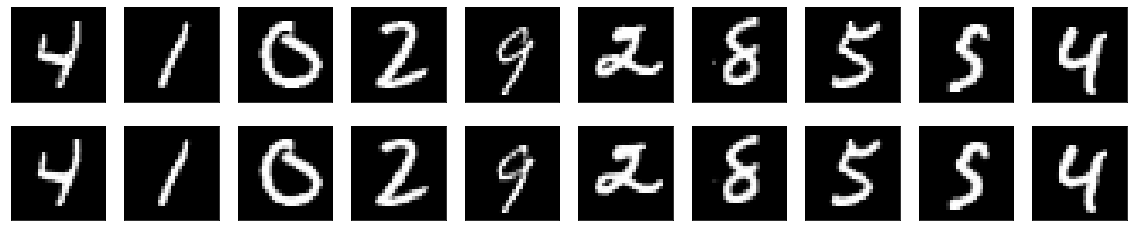

In [7]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)